# Movie Dataset




Hi there,

I’m the host of a movie reviews podcast and I’m currently making an episode about movie review aggregators.

I found this data set from Rotten Tomatoes. Could you dig into the data and share any interesting insights that you find? My audience loves fun facts about movies.

Thank you!





# 1.1 Explore Data
# 1.2 Create New Columns
# 1.3 Visualize Data


#  Read in the Data

In [1]:
# rotten tomatoes movie data set from Maven's data playground
import pandas as pd

movies = pd.read_csv("C:/Users/hp/Downloads/Rotten Tomatoes Movies.csv")
movies.head(3)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,254287.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,11567.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0,14670.0


In [2]:
# let's work with a subset of the data for this project
movies = movies[['movie_title', 'rating', 'genre', 'in_theaters_date','runtime_in_minutes',
                 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count']]
movies.head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0
2,10,R,"Comedy, Romance",1979-10-05,118.0,68,22,53.0,14670.0
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957-04-13,95.0,100,51,97.0,105000.0
4,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",1954-01-01,127.0,89,27,74.0,68860.0


# 1.1 Explore the Data

How many movies are in this data set?

In [3]:
movies["movie_title"].value_counts()

movie_title
Home                                        5
Hamlet                                      5
Alice in Wonderland                         4
The Three Musketeers                        4
Little Women                                4
                                           ..
Zeus and Roxanne                            1
Ziegfeld Follies                            1
Ziggy Stardust and the Spiders from Mars    1
Zindagi Na Milegi Dobara                    1
10,000 B.C.                                 1
Name: count, Length: 16106, dtype: int64

In [4]:
movies["movie_title"].nunique()

16106

Filter the data to only include movies that came out in 2010 or later. How many movies are in this new data set?

In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_title         16638 non-null  object 
 1   rating              16638 non-null  object 
 2   genre               16621 non-null  object 
 3   in_theaters_date    15823 non-null  object 
 4   runtime_in_minutes  16483 non-null  float64
 5   tomatometer_rating  16638 non-null  int64  
 6   tomatometer_count   16638 non-null  int64  
 7   audience_rating     16386 non-null  float64
 8   audience_count      16386 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 1.1+ MB


In [6]:
movies["in_theaters_date"]=movies["in_theaters_date"].astype("datetime64[ns]")

In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   rating              16638 non-null  object        
 2   genre               16621 non-null  object        
 3   in_theaters_date    15823 non-null  datetime64[ns]
 4   runtime_in_minutes  16483 non-null  float64       
 5   tomatometer_rating  16638 non-null  int64         
 6   tomatometer_count   16638 non-null  int64         
 7   audience_rating     16386 non-null  float64       
 8   audience_count      16386 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.1+ MB


In [8]:
movies['year'] = movies['in_theaters_date'].dt.year
movies['year']

0        2010.0
1        2010.0
2        1979.0
3        1957.0
4        1954.0
          ...  
16633    1981.0
16634    2016.0
16635    1964.0
16636    1964.0
16637    1979.0
Name: year, Length: 16638, dtype: float64

In [9]:
movies[movies["year"]>=2010]

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,year
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0,2010.0
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0,2010.0
97,Fireflies in the Garden,R,Drama,2011-10-14,98.0,22,54,45.0,45150.0,2011.0
130,The Oxford Murders,R,"Art House & International, Drama, Horror, Myst...",2010-08-06,110.0,9,11,33.0,14548.0,2010.0
155,Priest,PG-13,"Action & Adventure, Horror, Mystery & Suspense...",2011-05-13,83.0,15,99,46.0,86566.0,2011.0
...,...,...,...,...,...,...,...,...,...,...
16623,Zombeavers,R,"Action & Adventure, Comedy, Horror",2015-03-20,85.0,69,35,31.0,3629.0,2015.0
16628,Zoo,PG,"Action & Adventure, Kids & Family",2018-06-08,96.0,88,17,62.0,120.0,2018.0
16629,Zookeeper,PG,"Comedy, Romance",2011-07-08,101.0,14,131,41.0,44664.0,2011.0
16631,Zoolander 2,PG-13,Comedy,2016-02-12,102.0,23,226,20.0,41699.0,2016.0


In [10]:
import numpy as np

Find the highest rated movies according to both critics (*tomatometer_rating*) and the general audience (*audience_rating*).

In [11]:
movies["tomatometer_rating"].max()

100

In [12]:
movies["audience_rating"].max()

100.0

In [13]:
movies[(movies["tomatometer_rating"]==100) & (movies["audience_rating"]==100)]

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,year
2711,Anthony Jeselnik: Thoughts and Prayers,NR,Comedy,NaT,60.0,100,5,100.0,8.0,NaN
4239,Charm City,NR,Documentary,2018-10-19,108.0,100,16,100.0,24.0,2018.0
8235,John Mulaney: The Comeback Kid,NR,"Comedy, Television",NaT,62.0,100,8,100.0,5.0,NaN
9931,Momentum Generation,NR,Documentary,NaT,103.0,100,6,100.0,48.0,NaN
10021,Mosul,NR,Documentary,NaT,86.0,100,5,100.0,863.0,NaN
14566,The Miners' Hymns,NR,"Documentary, Drama, Special Interest",2012-02-08,52.0,100,10,100.0,148.0,2012.0
15001,The Uncondemned,NR,Documentary,2016-10-21,81.0,100,13,100.0,124.0,2016.0


These top movies seem to have very few critics and audience members writing the reviews. We want to look at only the most popular movies. Filter the movies data set to only include movies that have 100k+ audience ratings. How many movies are in this data set?

In [14]:
Popular_mov=movies[movies["audience_count"]>=100000]
Popular_mov

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,year
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0,2010.0
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957-04-13,95.0,100,51,97.0,105000.0,1957.0
5,"10,000 B.C.",PG-13,"Action & Adventure, Classics, Drama",2008-03-07,109.0,8,148,37.0,411087.0,2008.0
25,Tristan & Isolde,PG-13,"Drama, Science Fiction & Fantasy, Romance",2006-01-13,99.0,31,121,71.0,220945.0,2006.0
28,Running Scared,R,"Action & Adventure, Drama, Mystery & Suspense",2006-02-24,119.0,41,130,79.0,135373.0,2006.0
...,...,...,...,...,...,...,...,...,...,...
16612,Zero Dark Thirty,R,Drama,2013-01-11,157.0,91,289,80.0,196969.0,2013.0
16622,Zodiac,R,Mystery & Suspense,2007-03-02,157.0,89,248,77.0,493811.0,2007.0
16626,Zombieland,R,"Comedy, Horror",2009-10-02,88.0,90,249,86.0,642759.0,2009.0
16630,Zoolander,PG-13,"Comedy, Special Interest",2001-09-28,105.0,64,137,80.0,944701.0,2001.0


In [15]:
movies["movie_title"][movies["audience_count"]>=100000].nunique()

1917

Find the highest rated **popular** movies according to both critics (*tomatometer_rating*) and the general audience (*audience_rating*).

In [16]:
movies["audience_count"].max()

35797635.0

In [17]:
movies["tomatometer_count"].max()

497

In [18]:
movies[(movies["audience_count"]>=100000) & ((movies["tomatometer_rating"]==100) | (movies["audience_rating"]==100))]

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,year
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957-04-13,95.0,100,51,97.0,105000.0,1957.0
672,Rear Window,PG,"Classics, Drama, Mystery & Suspense",1954-09-01,115.0,100,66,95.0,150539.0,1954.0
4389,Citizen Kane,PG,"Classics, Drama, Mystery & Suspense",1941-05-01,119.0,100,84,90.0,158857.0,1941.0
9587,Mary Poppins,G,"Classics, Comedy, Kids & Family, Musical & Per...",1964-08-26,139.0,100,50,86.0,682310.0,1964.0
11193,Pinocchio,G,"Animation, Kids & Family, Musical & Performing...",1940-02-07,88.0,100,51,73.0,279248.0,1940.0
12588,Singin' in the Rain,G,"Classics, Comedy, Musical & Performing Arts, R...",1952-01-01,102.0,100,56,95.0,138453.0,1952.0
13527,The Terminator,R,"Action & Adventure, Science Fiction & Fantasy",1984-10-26,108.0,100,61,89.0,775856.0,1984.0
15414,Toy Story,G,"Animation, Comedy, Kids & Family",1995-11-22,80.0,100,88,92.0,1109209.0,1995.0
15415,Toy Story 2,G,"Animation, Comedy, Kids & Family",1999-11-24,92.0,100,169,86.0,999952.0,1999.0


A lot of these popular movies seem to have a PG or PG-13 rating. How many movies fall under each type of rating?

*Use this popular movies data set going forward in this notebook.*

In [19]:
Popular_mov["rating"].value_counts()

rating
PG-13    783
R        688
PG       358
G         95
NR        10
Name: count, dtype: int64

What is the average audience rating for each movie rating type? Which rating type is most highly rated?

In [20]:
avg_ratings = Popular_mov.groupby("rating")["audience_rating"].mean().sort_values(ascending=False)
avg_ratings

rating
NR       74.200000
G        71.505263
R        69.361919
PG       63.818436
PG-13    62.367816
Name: audience_rating, dtype: float64

# 1.2 Create New Columns

Create a column in the DataFrame called 'Animation' and return a 1 if a movie is an 'Animation' movie and 0 otherwise. Do the same for *Action & Adventure* and *Comedy*.

*Hint: use np.where and str.contains*

In [21]:
movies["Animation"]=np.where(movies["genre"].str.contains('Animation',case=False),1,0)

In [22]:
movies["Action & Adventure"]=np.where((movies["genre"].str.contains('Action',case=False)) | (movies["genre"].str.contains('Adventure',case=False)),1,0)

In [23]:
movies["Comedy"]=np.where(movies["genre"].str.contains('Comedy',case=False),1,0)

In [24]:
movies.head()

,movie_title,rating,genre,in_theaters_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,audience_count,year,Animation,Action & Adventure,Comedy
0,Percy Jackson & the Olympians: The Lightning T...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",2010-02-12,83.0,49,144,53.0,254287.0,2010.0,0,1,1
1,Please Give,R,Comedy,2010-04-30,90.0,86,140,64.0,11567.0,2010.0,0,0,1
2,10,R,"Comedy, Romance",1979-10-05,118.0,68,22,53.0,14670.0,1979.0,0,0,1
3,12 Angry Men (Twelve Angry Men),NR,"Classics, Drama",1957-04-13,95.0,100,51,97.0,105000.0,1957.0,0,0,0
4,"20,000 Leagues Under The Sea",G,"Action & Adventure, Drama, Kids & Family",1954-01-01,127.0,89,27,74.0,68860.0,1954.0,0,1,0


Create a table where each row is a rating, each column is a genre and each value is the number of movies of that particular rating and genre. What insights do you gather?

In [25]:
genre_rating_table = pd.pivot_table(
    movies,
    index='rating',
    columns='genre',
    values='movie_title',
    aggfunc='count',
    fill_value=0)
print(genre_rating_table)

genre   Action & Adventure  Action & Adventure, Animation  \
rating                                                      
G                        0                              1   
NC17                     0                              0   
NR                      26                              3   
PG                      16                              0   
PG-13                   51                             13   
PG-13)                   0                              0   
R                      106                              0   
R)                       0                              0   

genre   Action & Adventure, Animation, Anime & Manga, Art House & International  \
rating                                                                            
G                                                       0                         
NC17                                                    0                         
NR                                                      0

Find the average critic and audience rating for an Animation movie vs a non-Animation movie. Do the same for Action & Adventure and Comedy. What insights do you gather?

In [26]:
# Animation vs Non-Animation
animation = movies[movies["Animation"] == 1]
non_animation = movies[movies["Animation"] == 0]

avg_animation = animation[["tomatometer_rating", "audience_rating"]].mean()
avg_non_animation = non_animation[["tomatometer_rating", "audience_rating"]].mean()

avg_animation, avg_non_animation

(tomatometer_rating    63.121993
 audience_rating       64.852941
 dtype: float64,
 tomatometer_rating    60.370267
 audience_rating       60.310602
 dtype: float64)

In [27]:
# Action & Adventure vs non
action = movies[movies["Action & Adventure"] == 1]
non_action = movies[movies["Action & Adventure"] == 0]

avg_action = action[["tomatometer_rating", "audience_rating"]].mean()
avg_non_action = non_action[["tomatometer_rating", "audience_rating"]].mean()

avg_action, avg_non_action

(tomatometer_rating    53.916194
 audience_rating       57.663473
 dtype: float64,
 tomatometer_rating    62.119759
 audience_rating       61.189560
 dtype: float64)

In [28]:
# Comedy vs Non-Comedy
comedy = movies[movies["Comedy"] == 1]
non_comedy = movies[movies["Comedy"] == 0]

avg_comedy = comedy[["tomatometer_rating", "audience_rating"]].mean()
avg_non_comedy = non_comedy[["tomatometer_rating", "audience_rating"]].mean()

avg_comedy, avg_non_comedy

(tomatometer_rating    54.791744
 audience_rating       58.225891
 dtype: float64,
 tomatometer_rating    63.194820
 audience_rating       61.553093
 dtype: float64)

# 1.3 Visualize the Data

Create a pair plot from the popular movies DataFrame.

In [29]:
import seaborn as sns

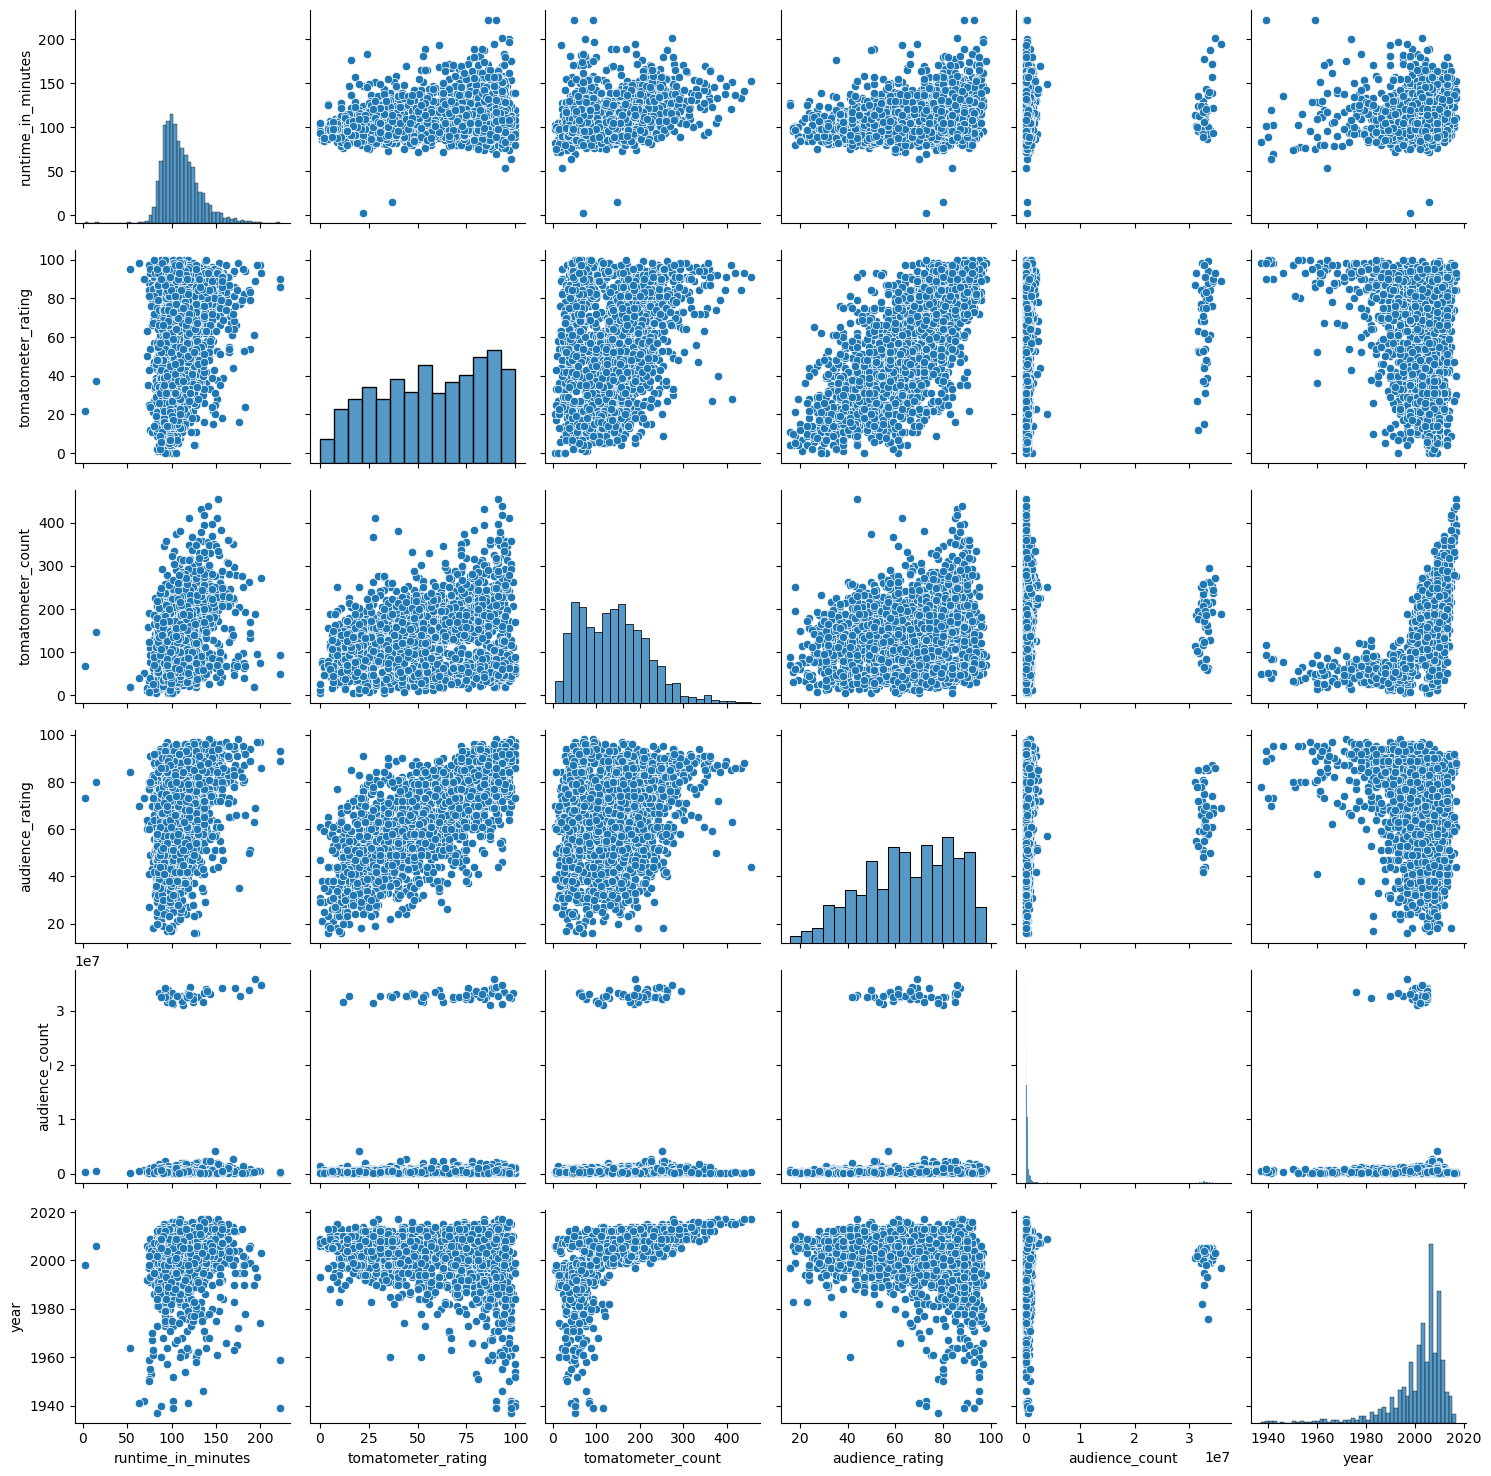

In [30]:
sns.pairplot(Popular_mov)